In [3]:
using Plots
using Interact
using LaTeXStrings
pgfplots()

Plots.PGFPlotsBackend()

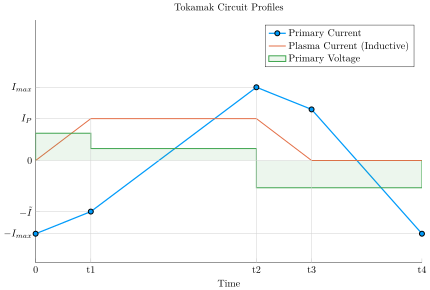

In [57]:
imax = 2.15
itilde = 1.5
ip = 1.23

x = [ 0 1 4 5 7 ]'
yp = [ 0 ip ip 0 0 ]'
yo = [ -imax -itilde imax itilde -imax ]'
t = [ 0 , "t1" ,"t2", "t3", "t4"]

circuit_profiles_plot = plot(grid=:none,yticks = ([0, -imax, +imax, ip, -itilde],[0, L"{-I_{max}}", L"I_{max}", L"I_P", L"{-\tilde{I}}"]))
plot!(x,yo, label="Primary Current",linewidth=1.25, marker=5)
plot!(x,yp, label="Plasma Current (Inductive)",linewidth=1, xticks = (x,t))

plot!([0,0,1,1,4,4,NaN,4,4,7,7],[0,0.8,0.8,0.35,0.35,0,NaN,0,-0.8,-0.8,0], label="Primary Voltage", fill=true, fillopacity=0.1)

cur_extreme = 4.25

plot!([1,1,NaN,4,4,NaN,5,5,NaN,0,1,NaN,0,4,NaN,0,1,NaN,0,5,NaN,0,7],[-cur_extreme,ip,NaN,-cur_extreme,imax,NaN,-cur_extreme,itilde,NaN,ip,ip,NaN,imax,imax,NaN,-itilde,-itilde,NaN,0,0,NaN,-imax,-imax], label="", linecolor=:lightgrey, linewidth=0.5)
# yticks!([0])

title!("Tokamak Circuit Profiles")
xlabel!("Time")
ylims!(-3,+4.125)
xlims!(0,7)


In [58]:
fa

In [41]:
function xx(x)
   [ x... , NaN , (x+7)..., NaN , (x+14)... ] 
end

function yy(y)
    [ y... , NaN , y..., NaN , y... ]
end

x_ru = [ 0 1 1 ]'
y_ru = [ 0 1 0 ]'

x_ft = [ 1 4 4 1 ]'
y_ft = [ 1 1 0 0 ]'

x_rd = [ 4 5 4 ]'
y_rd = [ 1 0 0 ]'

x_dw = [ 5 7 ]'
y_dw = [ 0 0 ]'

2×1 Array{Int64,2}:
 0
 0

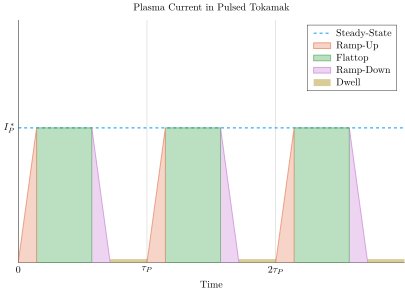

In [55]:
plasma_current_plot = plot()
plot!([ 0 21 ]', [ 1 1 ]', style=:dash, label="Steady-State", linewidth=1.5, alpha=0.65)
plot!(xx(x_ru), yy(y_ru), fill=true, fillalpha=0.3, label="Ramp-Up", alpha=0.6)
plot!(xx(x_ft), yy(y_ft), fill=true, fillalpha=0.35, label="Flattop", alpha=0.6)
plot!(xx(x_rd), yy(y_rd), fill=true, fillalpha=0.3, label="Ramp-Down", alpha=0.6)
plot!(xx(x_dw), yy(y_dw), linewidth=7, label="Dwell", alpha=0.45)

title!("Plasma Current in Pulsed Tokamak")
xlabel!("Time")

yaxis!([0, 1.8])
plot!(xticks=([0,7,14],[0,L"$\tau_P$", L"$2 \tau_P$"]), yticks=([1],[L"$I_P^{\,*}$"]), grid=:x)

In [56]:
savefig(plasma_current_plot,"pulsed_plasma_current.tex")